In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Printing basic data
print('People =', len(titanic))
print(titanic.columns)
titanic.isnull().sum()

People = 891
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Part 1: Variance

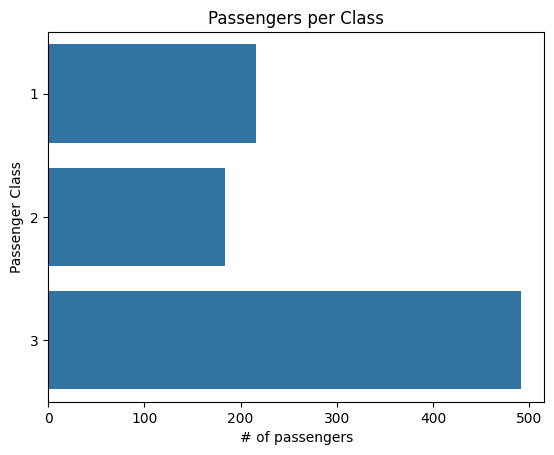

In [4]:
# Explore classes and their distribution
sns.countplot(data=titanic, y='Pclass')
plt.title('Passengers per Class')
plt.xlabel('# of passengers')
plt.ylabel('Passenger Class')
plt.show()

#

This reveals some interesting information regarding passenger class. As expected, third class is the most crowded of the three, but we also learn first class had more people than second class.

This distribution is probably due to the reasons of boarding the titanic; there was a good amount of big personalities expecting to be remembered in history for boarding the Titanic. On the other side, I believe there were many immigrants in third class looking for working opportunities in America. The second-class didn't really have a big selling point as the other two.

Mean: 32.204207968574636
STD: 49.6655344447741
Median: 14.4542


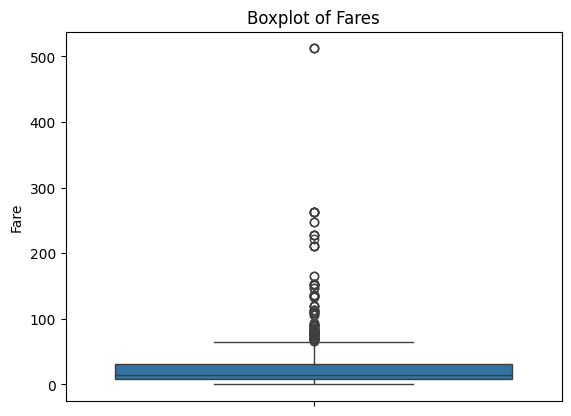

In [5]:
# Explore fares and their variance
sns.boxplot(data=titanic, y='Fare')
print("Mean:", np.mean(titanic['Fare']))
print("STD:", np.std(titanic['Fare']))
print("Median:", np.median(titanic['Fare']))

plt.title('Boxplot of Fares')
plt.ylabel('Fare')
plt.show()

This standard deviation indicates an unusually high dispersion of the data,
which, when confirming with the boxplot and other data, means there was some people paying
a lot more money than the rest.

Again, this could be due to the culture at the time regarding the Titanic and the popularity among the wealthy to be in it while maintaining their status and importance by getting the best cabins and privacy, while there were significantly more people boarding it with those possibilities.

# Part 2: Covariance

## What is the survivability of passengers per class?

The priorization of different classes' lives has been highlighted for decades, so now we will verify its connection to reality (the data), as well as find out, if confirmed, how priority changed per class.

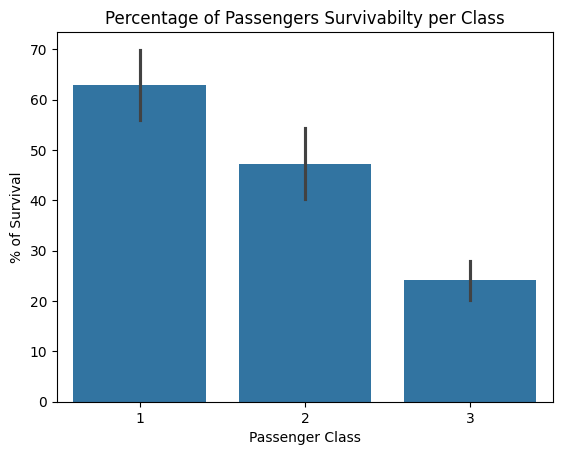

In [6]:
# We plot survivability per class
sns.barplot(x = titanic['Pclass'], y = titanic['Survived'] * 100) # Thus gives the mean per class (from 0 to 1) times 100 to display as percentage
plt.title('Percentage of Passengers Survivabilty per Class')
plt.xlabel('Passenger Class')
plt.ylabel('% of Survival')
plt.show()

It appears there is a certain tendency of survibability regarding class, so the claims do hold their ground. This is curious since there were some people similar fares but also completely different classes.

In [7]:
similar_fare_ex = titanic[(titanic['Fare'] < 57) & (titanic['Fare'] > 55)]
similar_fare_ex

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S


# This raises the question: how much does fare itself influence survivability?
We  will look at the lowest and top 3% regarding fares.

In [8]:
# We define them as "overpayers" and "underpayers"
quartiles = titanic['Fare'].quantile([0.05, 0.95]) 
overpayers = titanic.query(f'Fare > {quartiles[0.95]}')
underpayers =  titanic.query(f'Fare < {quartiles[0.05]}')

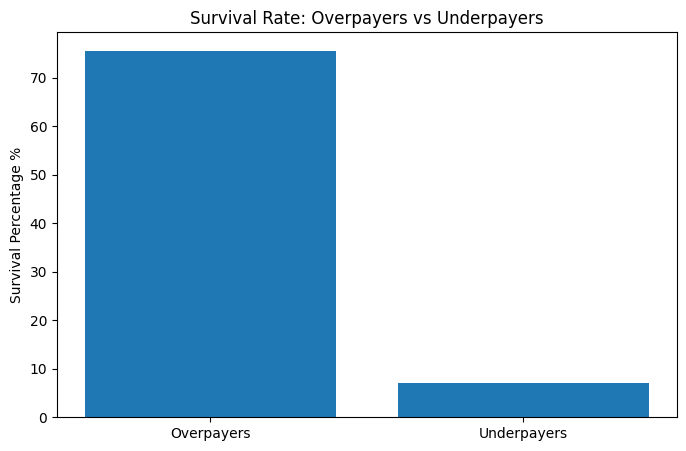

In [9]:
# Now we compare the survivability of overpaying and underpaying people and plot 
over_survival = len(overpayers.query('Survived == 1'))/len(overpayers)*100
under_survival = len(underpayers.query('Survived == 1'))/len(underpayers)*100

plt.figure(figsize=(8,5))
plt.bar(['Overpayers', 'Underpayers'], [over_survival, under_survival])

plt.title('Survival Rate: Overpayers vs Underpayers')
plt.ylabel('Survival Percentage %')

plt.show()

## How much did family influence survivability?

It is well-known there is a "women and children first" rule where they're prioritized to survive and for which we could confirm its veracity. However, we're more interested right now in finding out the influence of family in an individual's survival. Perhaps family protects and makes it easier to survive while loners get lost in the crows and perish. Of course, the opposite might be true; family may mean sacrifices while most loners have nobody to protect and can get to safety more easily. We'll find out by comparing sruvivability between people with no family and people with at least to members in their family (siblings, spouses, children and parents [parch]) 

In [10]:
# First, we define two data frames: loners and groupers (people with family)
loners = titanic[(titanic['SibSp'] == 0) & (titanic['Parch'] == 0)]
groupers = titanic[(titanic['SibSp'] > 0) | (titanic['Parch'] > 0)]

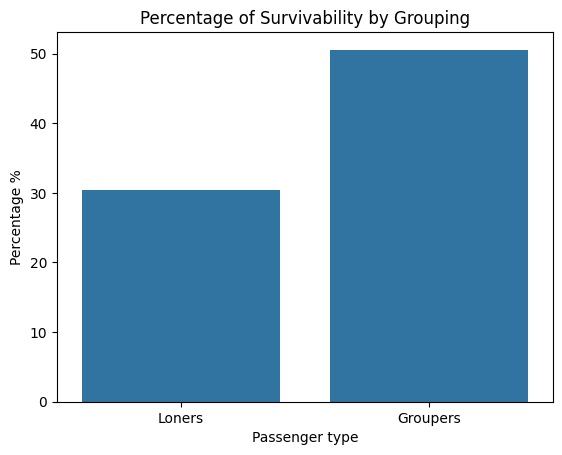

In [11]:
sns.barplot(x = ['Loners', 'Groupers'], y = [loners['Survived'].mean() * 100, groupers['Survived'].mean() * 100])
plt.title("Percentage of Survivability by Grouping")
plt.xlabel('Passenger type')
plt.ylabel('Percentage %')
plt.show()

This confirms there is strength in numbers. Groupers had a 50% survival rate compared to the loners' 30%. 

This could be due to internal protection between the family when loners have no one to vouch for them. It could have also been an organized priority by staff to save families (which generate more importance historically or in the future than random people) over individuals.

# Part 3: Missing Values

It is typical for all sources of information to have missing values. We will analyze which variables due and hypothesize why this could be.

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


<Axes: >

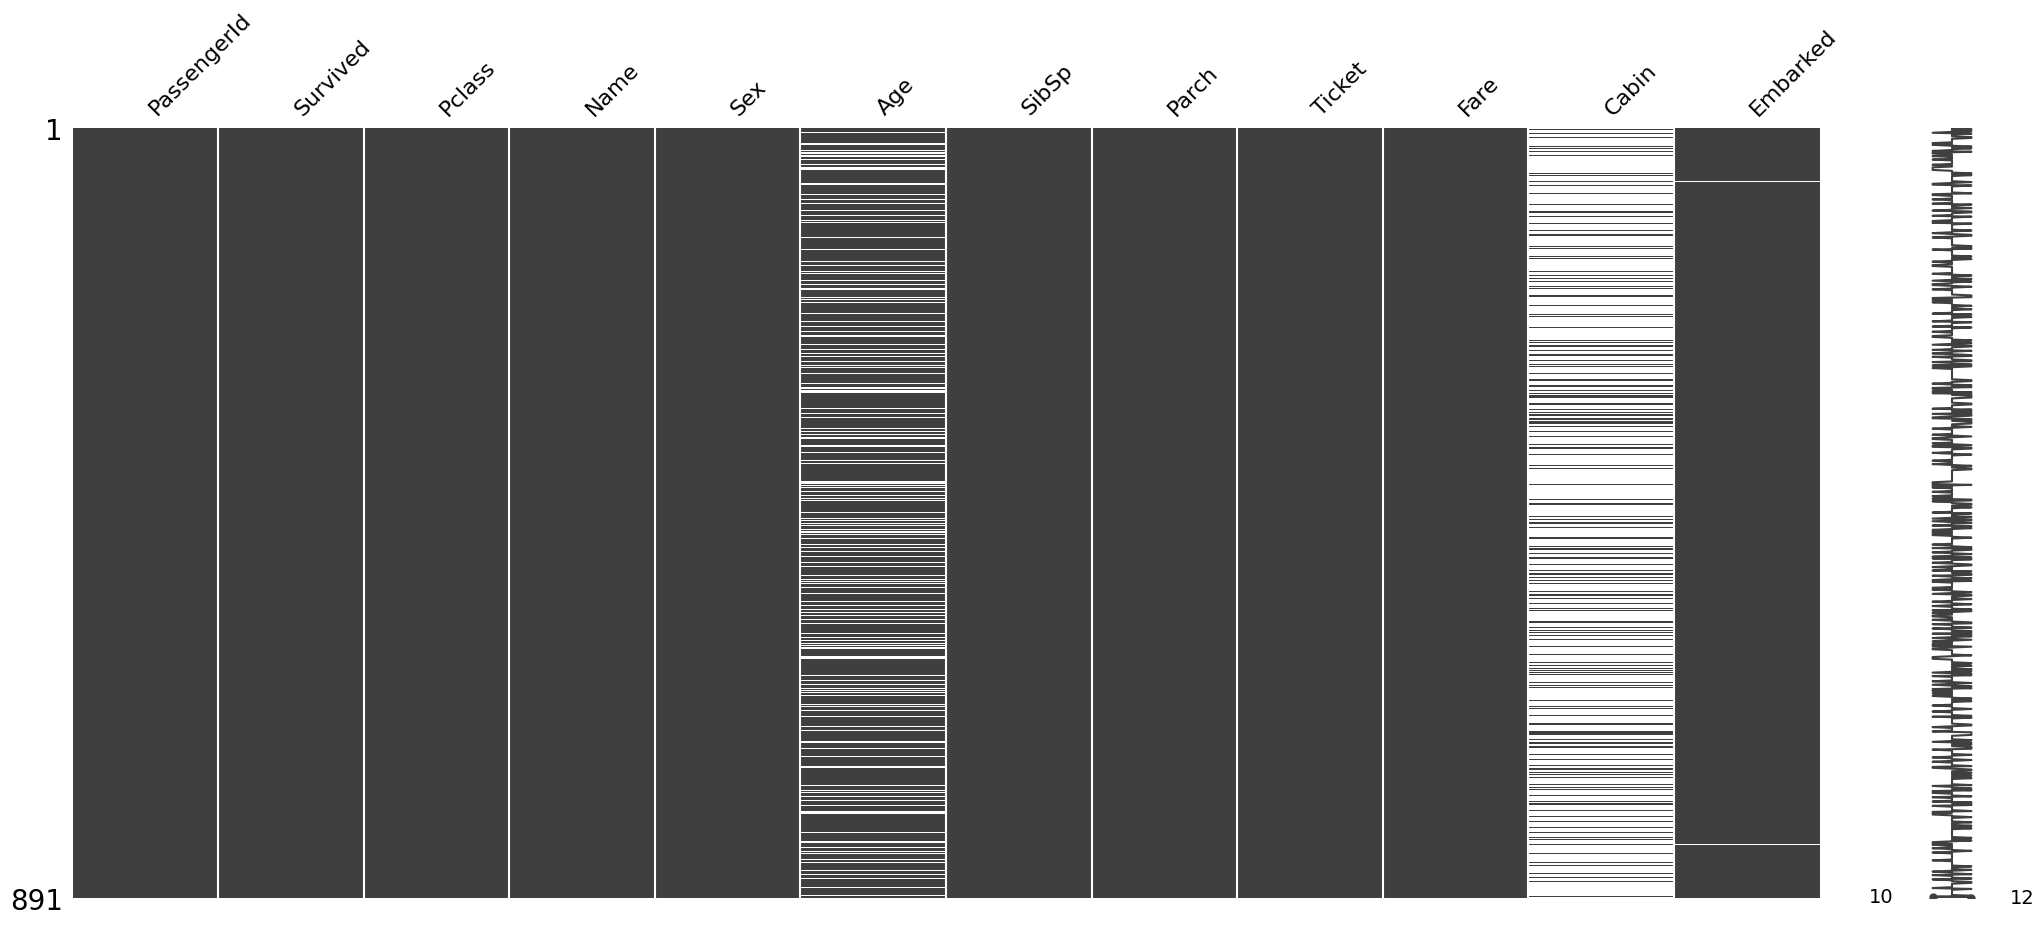

In [12]:
# This will show the different variables with no information in certain rows
import missingno as msno 
print(titanic.isnull().sum()/len(titanic))
msno.matrix(titanic)

The "embarked" missing data seems simple enough. Since it is only two people, it could be a simple error at the moment to record this data. Age and cabin, however, could be linked to parentage. If the individuals had parents, since they were the ones to buy the tickets and only their information might've been important, they might have more missing information in those variables. However it could also be due to people with spouses or other family where only one bought the tickets. Our already used data frames of groupers and loners can be of use.

In [13]:
groupers.isnull().sum()/len(groupers)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.124294
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.689266
Embarked       0.000000
dtype: float64

In [14]:
loners.isnull().sum()/len(loners)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.247672
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.824953
Embarked       0.003724
dtype: float64

It seems to be the opposite of our initial assumption might be true. More loners had missing data in these variables. Perhaps with parties of several people it was important to track more of them correctly while loners' age ould be ignored and they could be assigned wherever. This, especially in the cabins' matter, might be due to classes as well. Perhaps class is a factor of cabin registering.

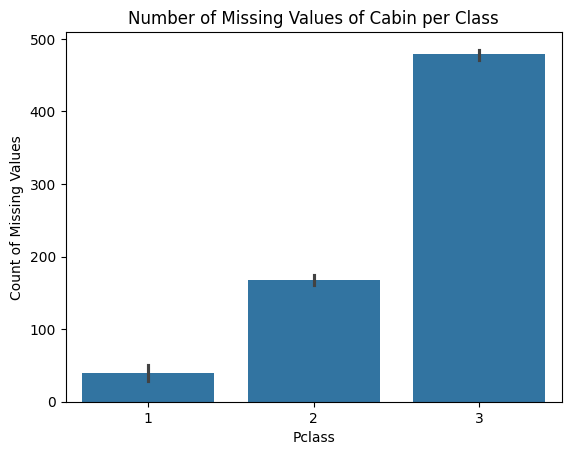

In [15]:
# Create a new column that counts if they have an NA value on cabin 
titanic['NA Cabin'] = titanic['Cabin'].isna()
sns.barplot(x = 'Pclass', y = 'NA Cabin', data = titanic, estimator = sum)

plt.title("Number of Missing Values of Cabin per Class")
plt.ylabel("Count of Missing Values")
plt.show()

As suspected, lower class passengers were more likely to not have an assigned cabin since those cabins weren't considered as imporant as those of higher classes.
To handle all these missing values, there are different ways to handle it depending on the variable.
* Embarked: since there are only two missing values out of hundreds, can be handled by replacing those with the mode.
* Age: it is unclear how to correct this since it's a variable that varies greatly. Also, sibling and spouses are grouped indistinctly, as well as parents and children. You could take the mean or median age and replace it in all those empty spaces, but since its not a significant part of the data, those people could be "ignored" when doing analysis regarding age.
* Cabin: if a value is missing, it could be replaced with only a letter referencing the person's class, (since levels a.k.a. cabin letters are chosen from the three different classes respecitvely) since the levels are the most important part of this info. They could also be ignored, but given the enormous amount of missing values, it would depend on the situation.

# Part 4: My Question 

Of course, the different clases contain different survivability rates. However:
## Through each different class, could the place of embarkment influence survivability rates, and would it have more influence on one class than the others? 
The question is justified by the fact that different embarkments could influence cabin positioning in each class. The cabin variable could come in handy as well, but embarkment (though more difficult to analyze) could be more accurate since it encompasses all passangers but two, while mmost passangers don't have their information, which would leave us with little data to analyze.
Ejemplos de buenas preguntas: